## Imports

In [ ]:
# Import packages
import pandas as pd
import numpy as np

import scipy.stats as stats
import pingouin as pg

import random
from random import randrange

import matplotlib.pyplot as plt
import seaborn as sns

import Orthoscripts

pd.options.mode.chained_assignment = None 

#### Import genelists

In [ ]:
# Asterias rubens
Astrub = Orthoscripts.readBED("Data/Genelists/Asterias.rubens.genelist.bed")

# Holothuria leucospilota
Holleu = Orthoscripts.readBED("Data/Genelists/Holothuria.leucospilota.genelist.bed")

# Paracentrotus livides
Parliv = Orthoscripts.readBED("Data/Genelists/Paracentrotus.lividus.genelist.bed")

# Branchiostoma lanceolatum
Bralan = Orthoscripts.readBED("Data/Genelists/Branchiostoma.lanceolatum.genelist.bed")

# Branchiostoma floridae
Braflo = Orthoscripts.readBED("Data/Genelists/Branchiostoma.floridae.genelist.bed", 's')

# Marthasterias glacialis
Margla = Orthoscripts.readBED("Data/Genelists/Marthasterias.glacialis.genelist.bed")

# Pecten maximus
Pecmax = Orthoscripts.readBED("Data/Genelists/Pecmax.genelist.bed", 's')

# Stichopus chloronotus
Stichl = Orthoscripts.readBED("Data/Genelists/Stichopus.chloronotus.genelist.bed")

# Amphiura filiformis 
Ampfil = Orthoscripts.readBED("Data/Genelists/Amphiura.filiformis.genelist.bed")

# Ephydatia muelleri
Ephmue = Orthoscripts.readBED("Data/Genelists/Ephmue.genelist.bed", 's')

# Ancestor 
AniAnc = Orthoscripts.readBED("Data/Genelists/AniAnc.genelist.bed", 's')
BilAnc = Orthoscripts.readBED("Data/Genelists/BilAnc.genelist.bed", 's')

#### Import ortholog files

In [ ]:
# Import orthologs
Astrub_Holleu = np.loadtxt("Data/Orthologs/Asterias.rubens+Holothuria.leucospilota.txt", dtype = "str")

Astrub_Parliv = np.loadtxt("Data/Orthologs/Asterias.rubens+Paracentrotus.lividus.txt", dtype = "str")

Holleu_Parliv = np.loadtxt("Data/Orthologs/Holothuria.leucospilota+Paracentrotus.lividus.txt", dtype = "str")

Margla_Bralan = np.loadtxt("Data/Orthologs/Marthasterias.glacialis+Branchiostoma.lanceolatum.txt", dtype = "str")

Margla_Pecmax = np.loadtxt("Data/Orthologs/Marthasterias.glacialis+Pecten.maximus.txt", dtype = "str")

Margla_Stichl = np.loadtxt("Data/Orthologs/Marthasterias.glacialis+Stichopus.chloronotus.txt", dtype = "str")

Pecmax_Bralan = np.loadtxt("Data/Orthologs/Pecten.maximus+Branchiostoma.lanceolatum.txt", dtype = "str")

Stichl_Bralan = np.loadtxt("Data/Orthologs/Stichopus.chloronotus+Branchiostoma.lanceolatum.txt", dtype = "str")

Stichl_Pecmax = np.loadtxt("Data/Orthologs/Stichopus.chloronotus+Pecten.maximus.txt", dtype = "str")

Pecmax_Holleu = np.loadtxt("Orthology pipeline/orthologs/Pecmax+Holleu_sensitive.txt", dtype = "str")

Holleu_Bralan = np.loadtxt("Orthology pipeline/orthologs/Holleu+Bralan_sensitive.txt", dtype = "str")

Pecmax_Bralan = np.loadtxt("Orthology pipeline/orthologs/Pecmax+Bralan_sensitive.txt", dtype = "str")

Pecmax_Braflo = np.loadtxt("Orthology pipeline/orthologs/Pecmax+Braflo_sensitive.txt", dtype = "str")

Holleu_Braflo = np.loadtxt("Orthology pipeline/orthologs/Holleu+Braflo_sensitive.txt", dtype = "str")

Holleu_Ampfil = np.loadtxt("Data/Orthologs/Holothuria.leucospilota+Amphiura.filiformis.txt", dtype = "str")

Braflo_Ephmue = np.loadtxt("Orthology pipeline/orthologs/Braflo+Ephmue_sensitive.txt", dtype = "str")

Holleu_Ephmue = np.loadtxt("Orthology pipeline/orthologs/Holleu+Ephmue_sensitive.txt", dtype = "str")

Pecmax_Ephmue = np.loadtxt("Orthology pipeline/orthologs/Pecmax+Ephmue_sensitive.txt", dtype = "str")

#### Sorting out the data

In [ ]:
Astrub = Astrub.loc[Astrub['Chromosome'].str.contains('chr')]
Bralan = Bralan.loc[Bralan['Chromosome'].str.contains('BFL_')]
Braflo = Braflo.loc[Braflo['Chromosome'].str.contains('BFL_')]
Pecmax = Pecmax.loc[Pecmax['Chromosome'].str.contains('PYE_')]
Ephmue = Ephmue.loc[Ephmue['Chromosome'].str.contains('EMU_')]

# Ephmue genelist: remove suffix
Ephmue['Name'] = Ephmue['Name'].str.rsplit('.t1').str.get(0)

# Parliv genelist: select chromosomal scaffolds
Parliv = Orthoscripts.unscaff(Parliv, 100)
Ampfil = Orthoscripts.unscaff(Ampfil, 100)
Ephmue = Orthoscripts.unscaff(Ephmue, 600)

Astrub_Parliv = Orthoscripts.orthFix(Astrub_Parliv, 'B', 'Parliv_', 1)
Margla_Bralan = Orthoscripts.orthFix(Margla_Bralan, 'A', '.1', 0)
Margla_Stichl = Orthoscripts.orthFix(Margla_Stichl, 'A', '.1', 0)
Margla_Stichl = Orthoscripts.orthFix(Margla_Stichl, 'B', '.1', 0)
Margla_Pecmax = Orthoscripts.orthFix(Margla_Pecmax, 'B', '.1', 0)
Holleu_Ampfil = Orthoscripts.orthFix(Holleu_Ampfil, 'B', '.1', 0)
Holleu_Bralan = Orthoscripts.orthFix(Holleu_Bralan, 'B', '_', 0)

### 
-----

### Plots

In [ ]:
data = Orthoscripts.orthofind(Braflo, Ephmue, Braflo_Ephmue)
Orthoscripts.orthoplot(data, 'Amphioxus', 'Sponge', 'A', 'B')

-----
### Simulations

In [ ]:
def makeancestor(Nchr, Ngene):
    ancestor = pd.DataFrame(columns = ['Chr'])
    for i in range(Nchr):
        row = {'Chr' : (i + 1)}
        for i in range(Ngene):
            ancestor = pd.concat([ancestor, pd.DataFrame([row])], ignore_index = True)
    ancestor['Genes'] = (ancestor.reset_index().index + 1)

    return ancestor

Nchr = 20
Ngene = 100
ancestor = makeancestor(Nchr, Ngene)
chr = ancestor.Chr.unique().tolist()
ancestor

In [ ]:
# Dummy BED files :: type 'anc' for ancestor, 'des' for descendant
def dummyBED(genome, type, outfile):
    if type == 'anc':
        genome['Chr'] = 'AncChr' + genome['Chr'].astype(str)
        genome['Genes'] = 'ancg_' + genome['Genes'].astype(str)
        
    if type == 'des':
        genome['Chr'] = 'Chr' + genome['Chr'].astype(str)
        genome['Genes'] = 'g_' + genome['Genes'].astype(str)
    
    genome['Start'] = np.arange(len(genome))
    genome['End'] = np.arange(len(genome)) + 5
    
    genome = genome[['Chr', 'Start', 'End', 'Genes']]
    
    with open(outfile, 'w') as out:
        out.write(genome.to_string(header = False, index = False))
        
    return genome

# Dummy ortholog file
def dummyOrthologs(genome, outfile):
    
    orthologs = pd.DataFrame()
    
    orthologs['Orthologs'] = np.arange(len(genome)) + 1
    orthologs['speciesA'] = np.arange(len(genome)) + 1
    orthologs['speciesB'] = np.arange(len(genome)) + 1
    
    orthologs['Orthologs'] = 'orthologs_' + orthologs['Orthologs'].astype(str)
    orthologs['speciesA'] = 'ancg_' + orthologs['speciesA'].astype(str)
    orthologs['speciesB'] = 'g_' + orthologs['speciesB'].astype(str)
    
    with open(outfile, 'w') as out:
        out.write(orthologs.to_string(header = False, index = False))

In [ ]:
def fusion(genome, chr, mixing = 0):
    '''
    inputs: 
    ancestor : df with chromosome name | gene name
    mixing : float between 0 and 1, where 1 implies extreme mixing and 0 implies no mixing
    '''
    
    # Randomly select two chromosomes to fuse
    A = random.choice(chr)
    B = random.choice(chr)
    
    chr = [x for x in chr if x not in (A, B)]
    
    if A == B: # Just so the same chromosome isn't selected twice
        B = random.choice(chr)

    fusion = ancestor.loc[ancestor['Chr'].isin([A, B])]
    
    # Apply mixing if required
    if mixing > 0:
        genes = fusion['Genes'].to_numpy()
        n = len(genes)
        for i in range(int(mixing * n)):
            g1, g2 = randrange(n), randrange(n)
            genes[g2], genes[g1] = genes[g1], genes[g2]

        fusion['Genes'] = genes
        fusion['Chr'] = f'{A}x{B}'
        
    else:
         fusion['Chr'] = f'{A}+{B}'
    
    # Remove the unfused chromosomes
    genome.drop(genome[genome['Chr'].isin([A, B])].index, inplace = True)
    genome = pd.concat([genome, fusion])
    
    log = f'Fusion of AncChr{A} and AncChr{B} into Chr{A}+{B}'
    
    return genome, log, chr

with pd.option_context('display.max_rows', None):
    print(fusion(ancestor, chr))

In [ ]:
def fission(genome, chr):
    # Randomly select a chromosome for fission
    A = random.choice(chr)
    fission = genome.loc[genome['Chr'] == A]
    chr.remove(A)

    pos = random.choice(range(1, Ngene))

    # Add the new chromosomes back into the genome
    chr1 = fission.iloc[: pos]
    chr1['Chr'] = f'{A}_1'
    chr2 = fission.iloc[pos :]
    chr2['Chr'] = f'{A}_2'
    
    # Remove the fission chromosome from the genome
    genome = pd.concat([genome, chr1, chr2])
    genome = genome[genome.Chr != A]
    
    log = f'Fission of AncChr{A} into Chr{A}_1 and Chr{A}_2'
    
    return genome, log, chr

with pd.option_context('display.max_rows', None):
    print(fission(ancestor, chr))

In [ ]:
def translocation(genome, chr):
    # Randomly select two chromosomes for translocation
    A = random.choice(chr)
    B = random.choice(chr)
    
    chr = [x for x in chr if x not in (A, B)]
    
    chrA = genome.loc[genome['Chr'] == A]
    chrB = genome.loc[genome['Chr'] == B]
    
    # Randomly select two break point positions
    posA = random.choice(range(1, Ngene))
    posB = random.choice(range(1, Ngene))
    
    # Join the fragments to form recombinant chromosomes
    chr1 = pd.concat([chrA.iloc[: posA], chrB.iloc[posB :]])
    chr1['Chr'] = f'{A};{B}'
    chr2 = pd.concat([chrB.iloc[: posB], chrA.iloc[posA :]])
    chr2['Chr'] = f'{A};{B}'
    
    # Remove the original chromosomes from the genome
    genome = pd.concat([genome, chr1, chr2]).drop(genome[(genome['Chr'] == A) & (genome['Chr'] == B)].index)
    
    log = f'Translocation between AncChr{A} and AncChr{B}'
    
    return genome, log

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(translocation(ancestor, chr))

In [ ]:
def synteny_loss(genome, chr):
    A = random.choice(chr)
    syn = genome.loc[genome['Chr'] == A]
    genome = genome[genome.Chr != syn]
    
    chr.remove(A)
    
    # Assign all elements to a random chromosome
    syn['Chr'] = random.choices(genome.Chr.unique(), k = len(syn))
    
    # Add back into the genome
    genome = pd.concat([genome, syn])
    
    log = f'Synteny loss of AncChr{A}'

    return genome, log

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(synteny_loss(ancestor, chr))

In [ ]:
speciesA = makeancestor(Nchr, Ngene)

speciesA, log = fission(speciesA)
print(log)

speciesA, log = fusion(speciesA)
print(log)

speciesA, log = fusion(speciesA, 0.5)
print(log)

with pd.option_context('display.max_rows', None):
    print(speciesA)

------------------------------

### Test simulations

In [13]:
def orthofind(genelistA, genelistB, orthologies):
    
    """
    inputs:
    genelistA: 
        gene list for species A
    genelistB: 
        gene list for species B
    orthologies: 
        orthology dataset 
    
    outputs: dataframe with significant ortholog combinations 
             and their location in species A and B and p-Values
    """
    
    # make ortholog dictionaries (ortholog : gene name)
    orthdictA = dict(zip(orthologies[:, 1], orthologies[:, 0]))
    orthdictB = dict(zip(orthologies[:, 2], orthologies[:, 0]))

    # replace genelist values with ortholog dictionary keys
    A_data = genelistA.copy()
    B_data = genelistB.copy()
    A_data['Name'] = A_data['Name'].map(lambda x: orthdictA.get(x, x))
    B_data['Name'] = B_data['Name'].map(lambda x: orthdictB.get(x, x))
    
    # make orthology location dictionaries (ortholog : chromosome)
    dictA = dict(zip(A_data.loc[A_data['Name'].str.contains('ortholog')].Name, 
                     A_data.loc[A_data['Name'].str.contains('ortholog')].Chromosome))
    dictB = dict(zip(B_data.loc[B_data['Name'].str.contains('ortholog')].Name, 
                     B_data.loc[B_data['Name'].str.contains('ortholog')].Chromosome))
    
    # seperate all orthology entries into new dataframe
    AB_data = pd.DataFrame({'Orthologs': orthologies[:, 0],
                            'A' : orthologies[:, 0],
                            'B' : orthologies[:, 0]})
    
    # replace location in A and B with ortholog location dictionary keys
    AB_data['A'] = AB_data['A'].map(dictA)
    AB_data['B'] = AB_data['B'].map(dictB)
    
    # calculate number of orthologs for each pair of chromosomes
    AB_data = AB_data.groupby(['A', 'B']).count().reset_index()
    
    return AB_data

In [54]:
# Import 
anc = Orthoscripts.readBED("Simulations/Ancestor.genelist.bed", 's')
spA = Orthoscripts.readBED("Simulations/SpeciesA.genelist.bed", 's')
orth = np.loadtxt("Simulations/Ancestor+SpeciesA.txt", dtype = "str")

sim = orthofind(anc, spA, orth)

sim

,A,B,Orthologs
0,AncChr1,Chr1,100
1,AncChr10,Chr10;17,31
2,AncChr10,Chr17;10,69
3,AncChr11,Chr11x20,100
4,AncChr12,Chr12,100
5,AncChr13,Chr13,100
6,AncChr14,Chr14+2,100
7,AncChr15,Chr15x16,100
8,AncChr16,Chr15x16,100
9,AncChr17,Chr10;17,62


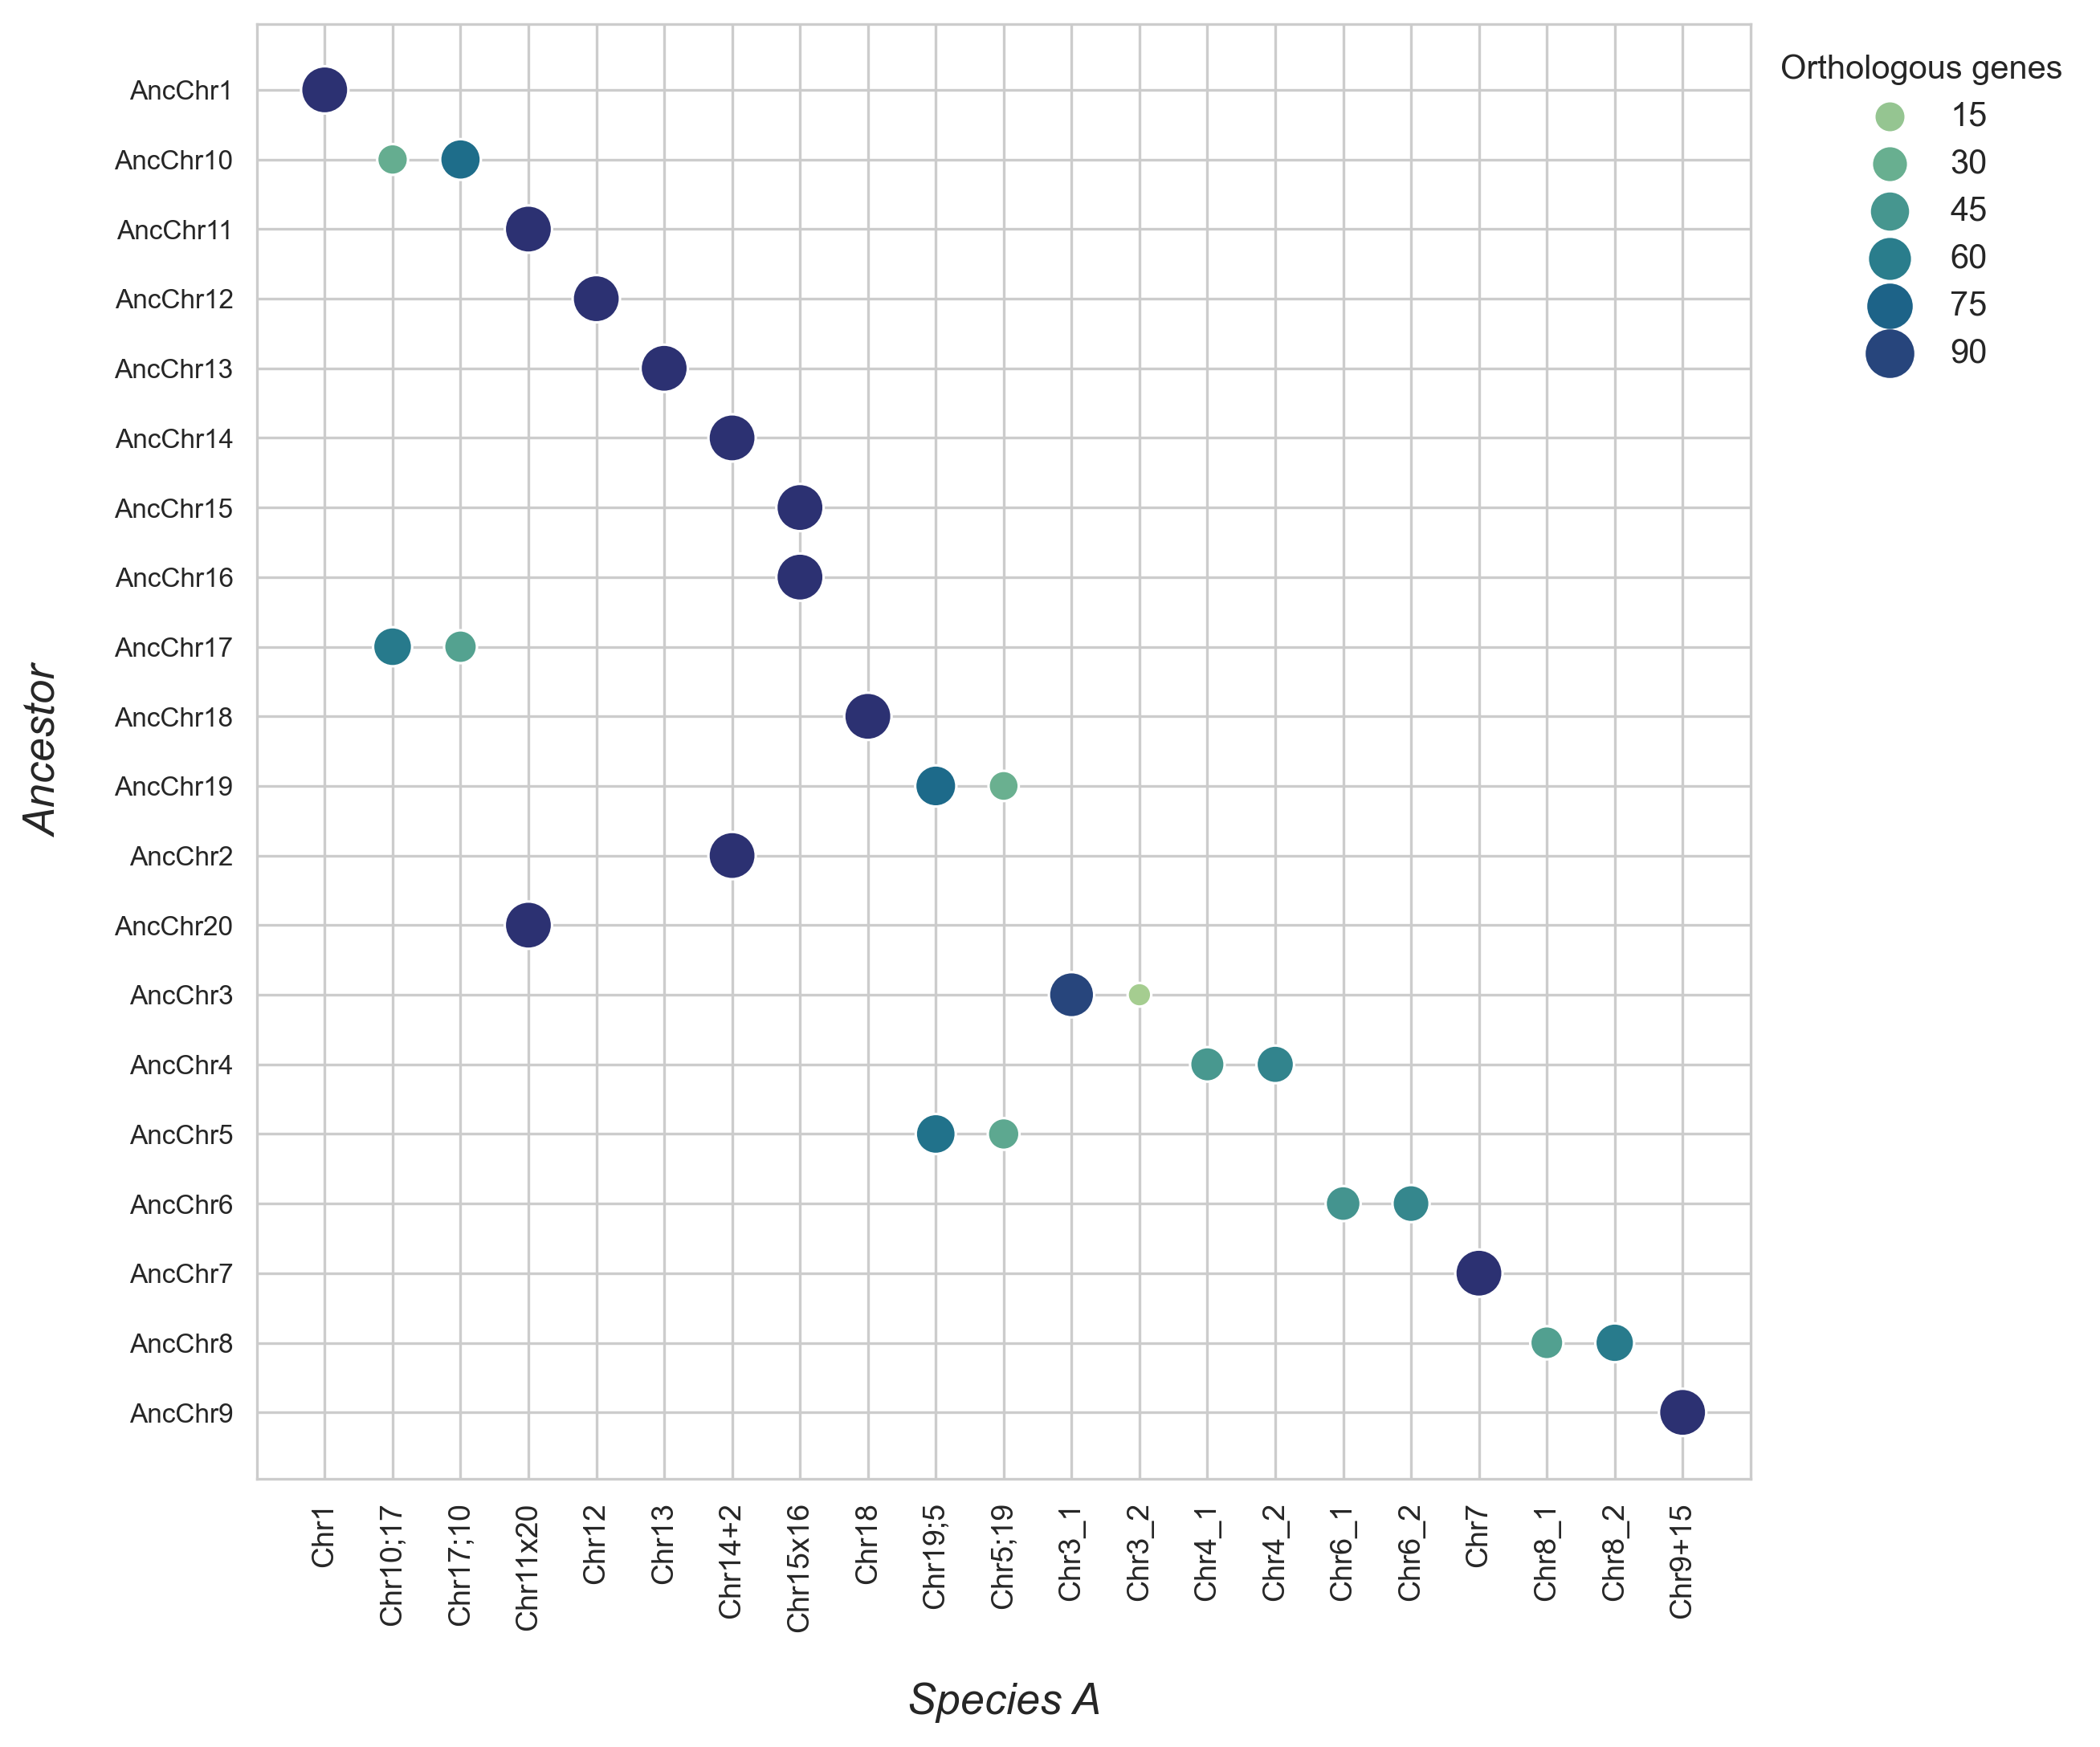

In [55]:
Orthoscripts.orthoplot(sim, 'Species A', 'Ancestor', 'B', 'A')

In [56]:
Orthoscripts.rearrangements(sim)

Fission of ancestral chromosome AncChr10 into ['Chr10;17', 'Chr17;10']
Fission of ancestral chromosome AncChr17 into ['Chr10;17', 'Chr17;10']
Fission of ancestral chromosome AncChr19 into ['Chr19;5', 'Chr5;19']
Fission of ancestral chromosome AncChr3 into ['Chr3_1', 'Chr3_2']
Fission of ancestral chromosome AncChr4 into ['Chr4_1', 'Chr4_2']
Fission of ancestral chromosome AncChr5 into ['Chr19;5', 'Chr5;19']
Fission of ancestral chromosome AncChr6 into ['Chr6_1', 'Chr6_2']
Fission of ancestral chromosome AncChr8 into ['Chr8_1', 'Chr8_2']
Fusion of ancestral chromosomes ['AncChr10', 'AncChr17'] into Chr10;17
Fusion of ancestral chromosomes ['AncChr11', 'AncChr20'] into Chr11x20
Fusion of ancestral chromosomes ['AncChr14', 'AncChr2'] into Chr14+2
Fusion of ancestral chromosomes ['AncChr15', 'AncChr16'] into Chr15x16
Fusion of ancestral chromosomes ['AncChr10', 'AncChr17'] into Chr17;10
Fusion of ancestral chromosomes ['AncChr19', 'AncChr5'] into Chr19;5
Fusion of ancestral chromosomes ['A

In [57]:
fissions = sim.pivot(index = 'A', columns='B', values = 'Orthologs')
fissions = fissions.loc[(fissions.where(fissions.isnull(), 1).sum(axis=1) > 1) | (fissions.sum(axis=0) > 1)]
fissions = fissions.stack(dropna = True).reset_index().groupby('A')['B'].apply(list).reset_index(name = 'B')
fissions

,A,B
0,AncChr10,"[Chr10;17, Chr17;10]"
1,AncChr17,"[Chr10;17, Chr17;10]"
2,AncChr19,"[Chr19;5, Chr5;19]"
3,AncChr3,"[Chr3_1, Chr3_2]"
4,AncChr4,"[Chr4_1, Chr4_2]"
5,AncChr5,"[Chr19;5, Chr5;19]"
6,AncChr6,"[Chr6_1, Chr6_2]"
7,AncChr8,"[Chr8_1, Chr8_2]"


In [58]:
fusions = sim.pivot(index = 'B', columns='A', values = 'Orthologs')
fusions = fusions.loc[(fusions.where(fusions.isnull(), 1).sum(axis=1) > 1) | (fusions.sum(axis=0) > 1)]
fusions = fusions.stack(dropna = True).reset_index().groupby('B')['A'].apply(list).reset_index(name = 'A')
fusions

,B,A
0,Chr10;17,"[AncChr10, AncChr17]"
1,Chr11x20,"[AncChr11, AncChr20]"
2,Chr14+2,"[AncChr14, AncChr2]"
3,Chr15x16,"[AncChr15, AncChr16]"
4,Chr17;10,"[AncChr10, AncChr17]"
5,Chr19;5,"[AncChr19, AncChr5]"
6,Chr5;19,"[AncChr19, AncChr5]"
